In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df=pd.read_csv('parkinsons_data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


#USING XGBOOST

In [ ]:
# Select the features from the DataFrame
features = df.loc[:, df.columns != 'status'].values[:, 1:]

# Select the labels from the DataFrame
labels = df.loc[:, 'status'].values

# Print the number of healthy and Parkinson's patients in the dataset
print(labels[labels==1].shape[0], labels[labels==0].shape[0])


147 48


In [ ]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)

y=labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=7)

In [ ]:
# Create an instance of the XGBClassifier model
model = XGBClassifier(eval_metric='mlogloss')

# Train the model on the training set
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
# Predict the labels for the test set
y_pred = model.predict(x_test)

# Print the accuracy score of the model on the test set
print(accuracy_score(y_test, y_pred) * 100)

94.87179487179486


In [ ]:
# Create a confusion matrix and display it as a DataFrame
conf_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)
conf_df

,Predicted Healthy,Predicted Parkinsons
True Healthy,6,1
True Parkinsons,1,31


<Axes: >

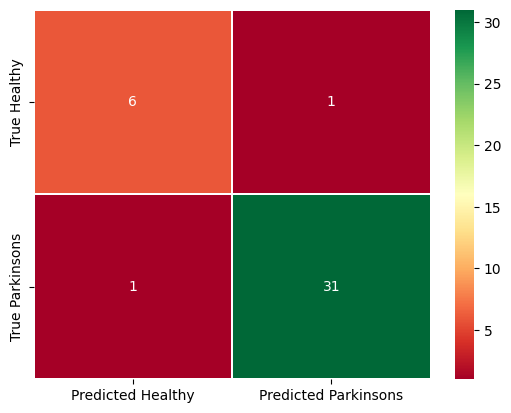

In [ ]:
# Plot a heatmap of the confusion matrix using seaborn
sns.heatmap(conf_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)

#**Using** SVM

In [ ]:
# Create an instance of the classifier object
classifi2 = SVC()

# Fit the classifier to the training data
classifi2.fit(x_train, y_train)

# Make predictions on the test data
y2_pred = classifi2.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y2_pred)
print("Accuracy:", accuracy * 100)
y2_pred = classifi2.predict(x_test)


Accuracy: 87.17948717948718


In [ ]:
# Create a confusion matrix and display it as a DataFrame
conf_df=pd.DataFrame(

    confusion_matrix(y_test, y2_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)
conf_df

,Predicted Healthy,Predicted Parkinsons
True Healthy,2,5
True Parkinsons,0,32


<Axes: >

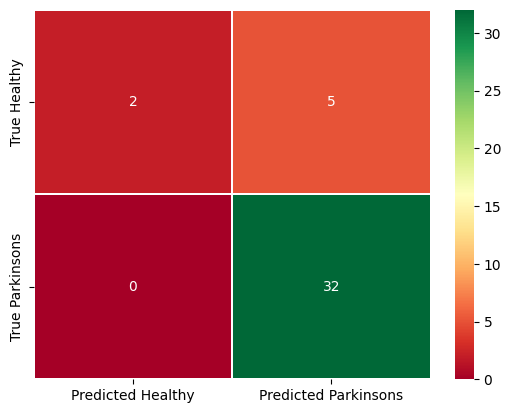

In [ ]:
# Plot a heatmap of the confusion matrix using seaborn
sns.heatmap(conf_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)

#Using KNN

In [ ]:
# Perform PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the training set
x_train = pca.fit_transform(x_train)

# Transform the test set using the same PCA transformation
x_test = pca.transform(x_test)

# Compute the explained variance ratio for each principal component
variance = pca.explained_variance_ratio_

# Create a k-nearest neighbors classifier with k=8, using Euclidean distance as the distance metric
classifi = KNeighborsClassifier(n_neighbors=8, p=2, metric='minkowski')

# Fit the classifier to the transformed training set
classifi.fit(x_train, y_train)

# Predict the labels for the transformed test set
y_pred = classifi.predict(x_test)

# Print the accuracy score of the classifier on the test set
print(accuracy_score(y_test, y_pred))



0.8974358974358975


In [ ]:
# Create a confusion matrix and display it as a DataFrame
conf_df=pd.DataFrame(

    confusion_matrix(y_test, y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons']

)
conf_df


,Predicted Healthy,Predicted Parkinsons
True Healthy,4,3
True Parkinsons,1,31


<Axes: >

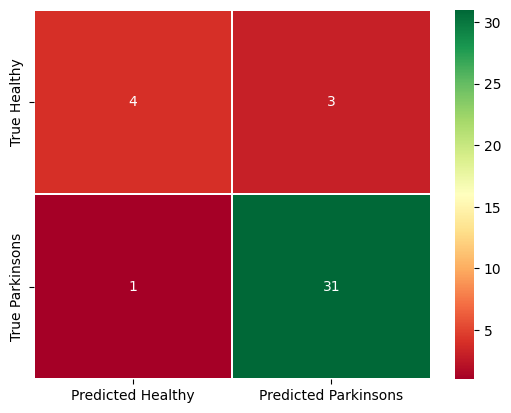

In [ ]:
# Plot a heatmap of the confusion matrix using seaborn
sns.heatmap(conf_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)

#Using Random Forest

In [ ]:
# Drop 'status' and 'name' columns from X
X = df.drop('status', axis=1)
X = X.drop('name', axis=1)

# Set y as the 'status' column
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
# Initialize the random forest classifier with 30 estimators and a max depth of 10
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

# Fit the random forest classifier to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_predict = random_forest.predict(X_test)

# Calculate the accuracy score of the random forest classifier
accuracy_score(y_test, y_predict)

0.9387755102040817

In [ ]:
# Create a confusion matrix and display it as a DataFrame
conf_df= pd.DataFrame(

confusion_matrix(y_test, y_predict),

columns=['Predicted Healthy', 'Predicted Parkinsons'],

index=['True Healthy', 'True Parkinsons']

)
conf_df

,Predicted Healthy,Predicted Parkinsons
True Healthy,11,1
True Parkinsons,2,35


<Axes: >

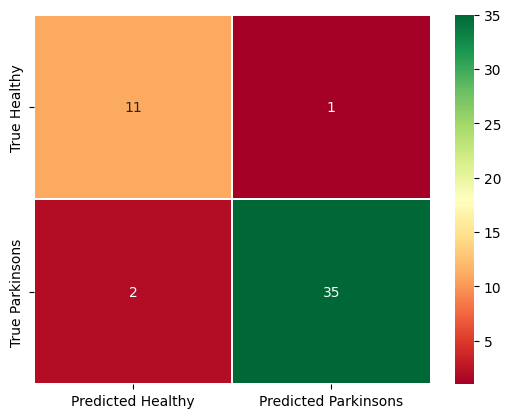

In [ ]:
# Plot a heatmap of the confusion matrix using seaborn
sns.heatmap(conf_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)